Домашнее задание 1. Эконометрика

In [177]:
# импортируем всё необходимое с учетом настроек с семинара
import pandas as pd
import seaborn as sn
import numpy as np
import statsmodels.api as sm
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as pt
pt.rcParams["font.size"] = 14
pt.rcParams['figure.figsize'] = (15, 8)
sn.set_style("whitegrid")

1.

In [178]:
wages = pd.read_csv(r'C:\Users\admin\metrix1-2024-hw1\wages.csv', sep = ',') # учитываем, что разделитель запятая (хотя вроде это автоматически тоже учлось бы)
wages.rename(columns = {'w': 'wage'}, inplace = True) # переименовываем колонку с зарплатой в более удобную
wages

,wage,sex,edu,age
0,10.44,1,1,19
1,13.52,1,1,20
2,19.12,1,1,21
3,20.28,1,1,25
4,14.63,1,1,26
...,...,...,...,...
145,27.81,2,4,59
146,27.81,2,4,59
147,26.09,2,5,27
148,24.95,2,5,37


2. Суммарные статистики wage и age

In [179]:
df = wages[['wage', 'age']]
df = df.describe().transpose() # транспонируем полученную табличку, чтобы было красивее
df

,count,mean,std,min,25%,50%,75%,max
wage,150.00,21.78,10.28,5.92,15.95,20.30,25.21,81.67
age,150.00,33.11,10.96,17.00,25.00,31.00,39.75,61.00


Общее число наблюдений составляет 150 и равняется числу строчек в изначальном датафрейме, поэтому совпадает у зарплаты и возраста. Средний возраст приблизительно 33 года, средняя зарплата - 21,8 гульденов в час. Минимальный возраст из наблюдений - 17 лет, максимальный - 61 год. Минимальная зп - 5,92 гульдена в час, максимальная - 81,67. Также можем видеть стандартные отклонения (std) и квантили (нижние 25% зарплат не превышают 15,95. Половина получает не выше 20,30. Верхние 25% получают более 25,21. Аналогично можно интерпретировать квантили для возраста)

In [180]:
from openpyxl import load_workbook # импортируем дополнительные модули (точнее из них импортируем доп. настройки), 
                                    # необходимые для более удачного оформления эконометрических таблиц
from openpyxl.styles import Border, Side, Font
def save_to_excel(file, name):
    folder = r'C:\Users\admin\metrix1-2024-hw1' # задаем сразу папку с дз, куда будут сохраняться все файлы
    filepath = os.path.join(folder, name)
    if not name.endswith('.xlsx'):
        filepath += '.xlsx' # добавляем к имени файла нужное расширение
    try:
        file.to_excel(filepath) # сохраняем файл по указанному пути в папку
        wb = load_workbook(filepath) # загружаем сохраненную книгу эксель для дальнейшей работы с ней
        ws = wb.active
        thin = Side(border_style="thin", color="000000") # далее настраиваем прочерчивание границ в таблице
        border = Border(left=thin, right=thin, top=thin, bottom=thin)
        for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
            for cell in row:
                cell.border = border
        wb.save(filepath) # сохраняем изменения по указанному пути
        print(f'Таблица сохранена под именем {name}')
    except Exception as e:
        print(f'Произошла ошибка при сохранении: {e}') # выводим описание ошибки в удобном читаемом виде, если что-то пошло не так


In [181]:
save_to_excel(df, 'wage_and_age')

Таблица сохранена под именем wage_and_age


3. Суммарные статистики 4 переменных

In [182]:
wages['log_wage'] = np.log(wages['wage']) # добавляем с помощью модуля numpy столбцы с логарифмами от зарплаты и возраста
wages['log_age'] = np.log(wages['age'])
df1 = wages[['wage', 'age', 'log_wage', 'log_age']] # создаем новый датафрейм из нужных столбцов
df1 = df1.describe().transpose()
df1

,count,mean,std,min,25%,50%,75%,max
wage,150.00,21.78,10.28,5.92,15.95,20.30,25.21,81.67
age,150.00,33.11,10.96,17.00,25.00,31.00,39.75,61.00
log_wage,150.00,2.99,0.43,1.78,2.77,3.01,3.23,4.40
log_age,150.00,3.45,0.32,2.83,3.22,3.43,3.68,4.11


In [183]:
save_to_excel(df1, 'wage_and_age_and_logs')

Таблица сохранена под именем wage_and_age_and_logs


Иногда логарифмы помогают более точно строить модели и анализировать данные, сокращая асимметричность изначальных показателей и влияние выбросов на построенную регрессионную модель. 

4.

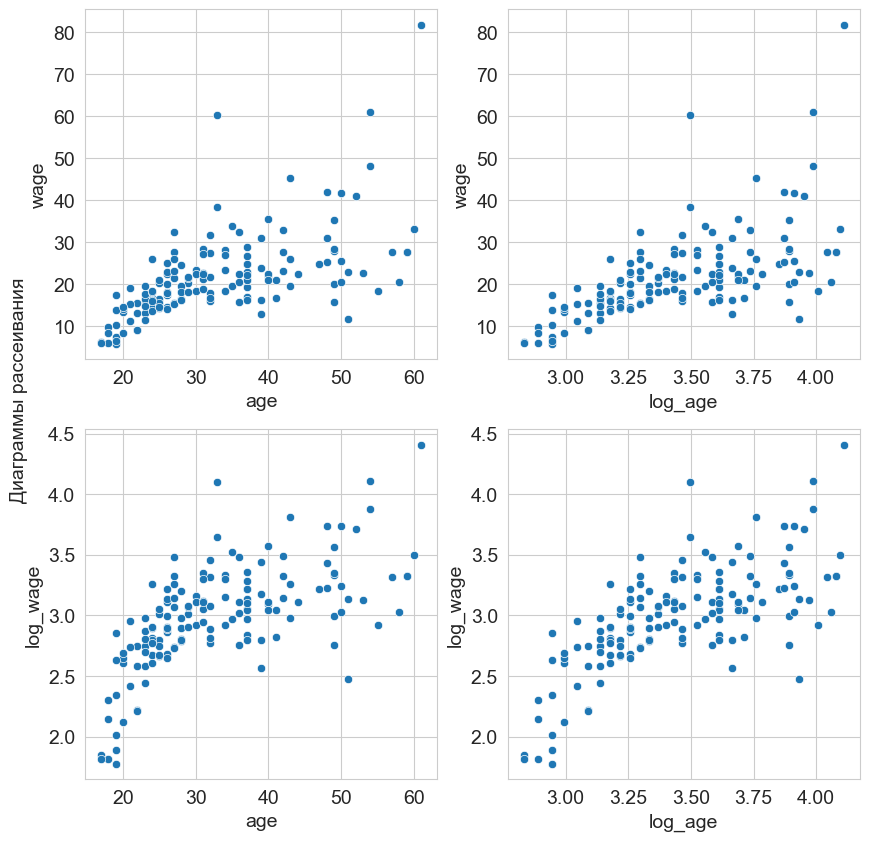

In [184]:
fig, ax = pt.subplots(2,2, figsize = (10,10)) # задаем параметры для того, чтобы 4 графика отображались на одной картинке

sn.scatterplot(data=wages, y='wage', x='age', ax = ax[0,0]) # задаем датафрейм, оси и относительное расположение
#ax[0,0].set_title('1') - можно сделать подписи под каждым графиком, но они как-то некрасиво налезают друг на друга
sn.scatterplot(data=wages, y='wage', x='log_age', ax = ax[0,1])
sn.scatterplot(data=wages, y='log_wage', x='age', ax = ax[1,0])
sn.scatterplot(data=wages, y='log_wage', x='log_age', ax = ax[1,1])

fig.text(x = 0.05, y = 0.5, s = 'Диаграммы рассеивания', rotation = 'vertical', va = 'center') # подпись сбоку 
pt1 = fig
pt.show()

На нижних двух графиках (с логаримом зарплаты) слишком большие и частые выбросы, зависимость совсем не похожа на линейную. На верхних двух (зарплата от возраста и логарифма вохраста) зависимость больше напоминает линейную. Более "гладким" кажется второй график сверху (от логарифма возраста).

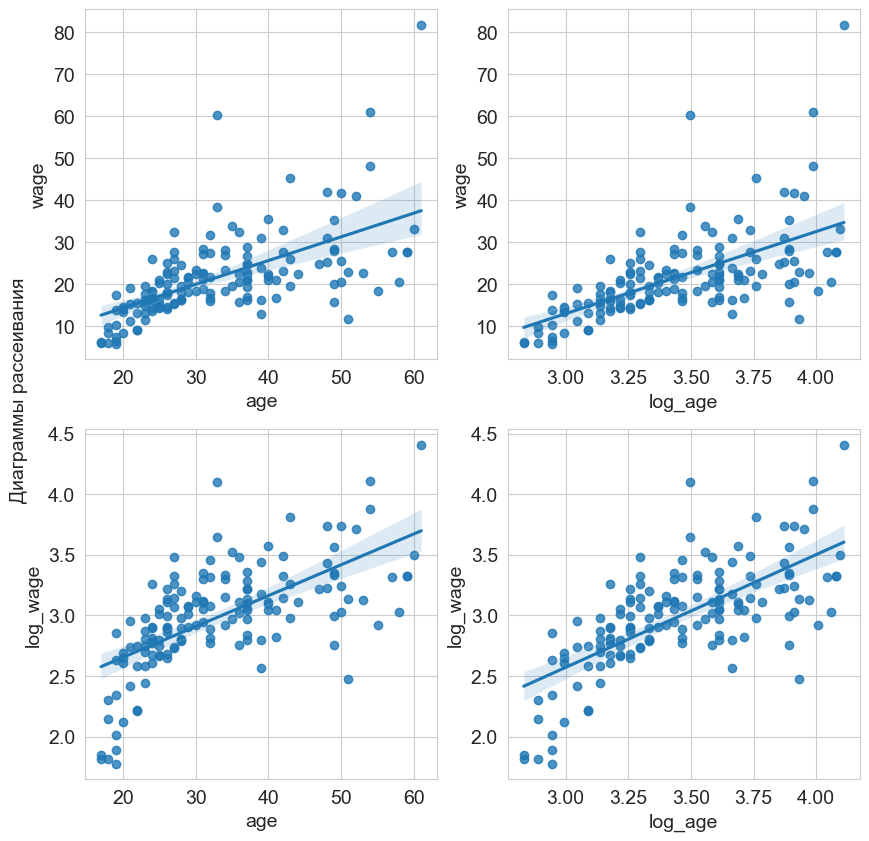

In [185]:
# только потом прочитала 9 пункт, изначально строила вот так, уже с линией регрессии
fig, ax = pt.subplots(2,2, figsize = (10,10))
sn.regplot(x='age', y='wage', data=wages, ax = ax[0,0])
sn.regplot(data=wages, y='wage', x='log_age', ax = ax[0,1])
sn.regplot(data=wages, y='log_wage', x='age', ax = ax[1,0])
sn.regplot(data=wages, y='log_wage', x='log_age', ax = ax[1,1])
fig.text(x = 0.05, y = 0.5, s = 'Диаграммы рассеивания', rotation = 'vertical', va = 'center')
pt2 = fig
pt.show()


Ближе к линейной зависимости - здесь тоже в верхних двух диаграммах, то есть зависимость зарплаты от возраста и логарифма возраста.

In [186]:
def save_as_pic(ris, name):
    folder = r'C:\Users\admin\metrix1-2024-hw1' # задаем опять же папку
    filepath = os.path.join(folder, name) # добавляем к указанному пути введенное в функцию имя файла
    if not name.endswith('.png'): # добавляем к названию нужное расширение, далее аналогично тому, что делали выше
        filepath += '.png'
    try:
        ris.savefig(filepath)
        print(f'Рисунок сохранен под именем {name}')
    except Exception as e:
        print(f'Произошла ошибка при сохранении: {e}')


In [187]:
save_as_pic(pt1, 'plot1')
save_as_pic(pt2, 'plot2')

Рисунок сохранен под именем plot1
Рисунок сохранен под именем plot2


5.

In [188]:
from statsmodels.regression.linear_model import OLS # сделано аналогично семинару
y = wages['wage'] # задаем зависимую переменную
X = sm.add_constant(wages[['age']]) # добавляем технический коэффициент (константу) к регрессору

reg_age_wage = sm.OLS(y, X).fit(cov_type='HC0') # задаем гетероскедастичность для ошибок (std errors) (по умолчанию была бы гомоскедастичность)
reg_age_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     34.36
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.87e-08
Time:                        21:40:32   Log-Likelihood:                -528.04
No. Observations:                 150   AIC:                             1060.
Df Residuals:                     148   BIC:                             1066.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0678      2.804      1.094      0.274      -2.428       8.563
age            0.5652      0.096      5.861      0.000       0.376       0.754
==============================================================================
Omnibus:                       83.544   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.503
Skew:                           1.942   Prob(JB):                    7.63e-110
Kurtosis:                      11.082   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

6. Интерпретация результатов анализа регрессии из предыдущего пункта:

Берем за основу 4 основных предположения с лекции (о случайности выборки, линейном приближении, различии данных по х - а они действительно неодинаковые и существовании 4 момента), к ним добавляем гетероскедастичность данных (вопреки пятому предположению).

Число степеней свободы: 1 (у нас всего один регрессор)

Число наблюдений: 150, достаточно большое, чтобы делать выводы и строить зависимость.

С экономической точки зрения логично предположить наличие причинно-следственной зависимости зарплаты от возраста, поэтому буду интерпретироать это в контексте причинно-следственной связи.

В среднем при прочих равных условиях при увеличении возраста на 1 год зарпата растет на 0,57 гульдена в час. 

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1 год, соответствующие им зарплаты отличаются на 0,57 гульдена в час.

В данном случае возраст не может равняться 0, поэтому константа не имеет практического смысла, не поддается смысловой интерпретации, это технический коэффициент, необходимый для построения более точной линии регрессии в нашем случае.

R^2 - коэффициент детерминации. Принимает значения от 0 до 1. Чем ближе к 1, тем меньше ошибок => точнее модель прогнозирует. В данном случае R^2 не очень большой, что говорит о скромной точности модели.

Стандартная ошибка b1 составляет 0,096, значение достаточно маленькое => оценка коэффиента b1 имеет высокую точность.

Коэффициент b0 и интерпретации для него на лекции не рассматривались отдельно. Но в теории здесь все аналогично. У константы довольно высокая ошибка, что говорит о низкой степени точности в ее оценке, поэтому данная модель не самая лучшая. И значение Z достаточно низкое => возможно, константа здесь незначима.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 5,861, что значительно больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

Также у нас рассчитывается p-value для данного значения Z. Его обычно сравнивают с уровнем значимости. У нас сразу посчитан доверительный интервал на 5% уровне значимости.

7.

In [189]:
y = wages['log_wage']
X = sm.add_constant(wages[['age']])

reg_age_log_wage = sm.OLS(y, X).fit(cov_type='HC0')
reg_age_log_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     67.36
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.02e-13
Time:                        21:40:32   Log-Likelihood:                -47.498
No. Observations:                 150   AIC:                             99.00
Df Residuals:                     148   BIC:                             105.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1443      0.105     20.518      0.000       1.939       2.349
age            0.0255      0.003      8.207      0.000       0.019       0.032
==============================================================================
Omnibus:                        4.490   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.713
Skew:                          -0.225   Prob(JB):                       0.0948
Kurtosis:                       3.743   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Берем за основу 4 основных предположения с лекции... и так далее все то, что повторяется с предыдущим пунктом. Дабы не утомлять ваш взор, не буду копипастить лишний раз, напишу только то, что отличается. 

В среднем при прочих равных условиях при увеличении возраста на 1 год зарпата растет на 0,0255*100% = 2,55%. (Можем принять такое приближение, поскольку b1 близок к 0).

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1 год, соответствующие им зарплаты отличаются на 2,55% (от меньшей), зависимость прямая.

R^2 - коэффициент детерминации. Принимает значения от 0 до 1. Чем ближе к 1, тем меньше ошибок => точнее модель прогнозирует. В данном случае R^2 принимает нормальные значения, но о высокой точности говорить не стоит.

Стандартная ошибка b1 составляет 0,003, значение крайне маленькое => оценка коэффиента b1 имеет высокую точность.

Коэффициент b0 и интерпретации для него на лекции не рассматривались отдельно. Но в теории здесь все аналогично. Ошибка для b0 достаточно низкая, Z очень высокий => оценка точная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 8,207, что значительно больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [190]:
y = wages['wage']
X = sm.add_constant(wages[['log_age']])

reg_log_age_wage = sm.OLS(y, X).fit(cov_type='HC0')
reg_log_age_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     46.96
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.82e-10
Time:                        21:40:32   Log-Likelihood:                -526.51
No. Observations:                 150   AIC:                             1057.
Df Residuals:                     148   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.6593      9.378     -4.869      0.000     -64.040     -27.279
log_age       19.5616      2.855      6.853      0.000      13.967      25.157
==============================================================================
Omnibus:                       96.279   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.721
Skew:                           2.226   Prob(JB):                    9.49e-159
Kurtosis:                      12.829   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Берем за основу 4 основных предположения с лекции... и так далее все то, что повторяется с предыдущим пунктом. Дабы не утомлять ваш взор, не буду копипастить лишний раз, напишу только то, что отличается. 

В среднем при прочих равных условиях при увеличении возраста на 1% зарплата растет на 19,56*0,01 = 0,196 гульденов в час.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1%, соответствующие им зарплаты отличаются на 0,196 гульденов в час (зависимость прямая).

R^2 - коэффициент детерминации. Принимает значения от 0 до 1. Чем ближе к 1, тем меньше ошибок => точнее модель прогнозирует. В данном случае R^2 принимает значение чуть выше, чем в первом случае (зп от возраста), значит, эта модель немного более точная.

Стандартная ошибка b1 составляет 2,855, значение невысокое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 невысокая, Z по модулю достаточно большой => оценка достаточно точная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 6,853, что значительно больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [191]:
y = wages['log_wage']
X = sm.add_constant(wages[['log_age']])

reg_log_age_log_wage = sm.OLS(y, X).fit(cov_type='HC0')
reg_log_age_log_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     88.72
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           8.52e-17
Time:                        21:40:32   Log-Likelihood:                -38.910
No. Observations:                 150   AIC:                             81.82
Df Residuals:                     148   BIC:                             87.84
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2213      0.339     -0.653      0.514      -0.885       0.443
log_age        0.9308      0.099      9.419      0.000       0.737       1.124
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.313
Skew:                          -0.045   Prob(JB):                        0.191
Kurtosis:                       3.722   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Берем за основу 4 основных предположения с лекции... и так далее все то, что повторяется с предыдущим пунктом. Дабы не утомлять ваш взор, не буду копипастить лишний раз, напишу только то, что отличается. 

В среднем при прочих равных условиях при увеличении возраста на 1% зарплата растет на 0,93%.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1%, соответствующие им зарплаты отличаются на 0,93% (зависимость прямая).

R^2 - коэффициент детерминации. Принимает значения от 0 до 1. Чем ближе к 1, тем меньше ошибок => точнее модель прогнозирует. В данном случае R^2 принимает значение чуть выше, чем во втором случае (логарифм зп от возраста), значит, эта модель немного более точная.

Стандартная ошибка b1 составляет 0,099, значение низкое => оценка коэффиента b1 имеет высокую точность.

Ошибка b0 достаточно высокая относительно него, Z низкий => оценка неточная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 9,419, что значительно больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

8.

In [192]:
!   pip install pandas openpyxl
from openpyxl import load_workbook
def save_regression_results(results, name):
    model_names = ['W ~ Age', 'Log(W) ~ Age', 'W ~ Log(Age)', 'Log(W) ~ Log(Age)']
    data = {}
    folder = r'C:\Users\admin\metrix1-2024-hw1'
    filepath = os.path.join(folder, name)
    if not name.endswith('.xlsx'):
        filepath += '.xlsx'
    for model_name, result in zip(model_names, results): # передаем этим переменным нужные нам значения из анализа регрессии
        params = result.params
        conf = result.bse
        pvalues = result.pvalues
        r2 = result.rsquared
        nobs = int(result.nobs)

        model_data = {}
        for var in ['const', 'age', 'log_age']:
            if var in params:
                signif = "***" if pvalues[var] < 0.01 else ("**" if pvalues[var] < 0.05 else ("*" if pvalues[var] < 0.1 else "")) # задаем параметры из задания для звездочек
                model_data[var] = f"{params[var]:.3f}{signif} ({conf[var]:.3f})" # выводим ошибку в скобках
            else:
                model_data[var] = "-"

        model_data["Observations"] = f"{nobs}" # добавляем число наблюдений и R^2
        model_data["R^2"] = f"{r2:.3f}"

        data[model_name] = model_data

    df = pd.DataFrame(data) # переводим в датафрейм

    df = df.loc[['age', 'log_age', 'const', 'Observations', 'R^2']]
    
    df.to_excel(filepath) # сохраняем в эксель

    wb = load_workbook(filepath)
    ws = wb.active

    new_column_names = ['зарплата', 'зарплата', 'log зарплаты', 'log зарплаты'] # переименовываем колонки
    for col_num, new_name in enumerate(new_column_names, start=2):
        ws.cell(row=1, column=col_num, value=new_name)

    new_row_names = ['возраст', 'log возраста', 'константа', 'Число наблюдений', 'R^2'] # переименовываем строки
    for row_num, new_name in enumerate(new_row_names, start=2): 
        ws.cell(row=row_num, column=1, value=new_name)

    thin = Side(border_style="thin", color="000000") # прочерчиваем границы и задаем их ширину
    border = Border(left=thin, right=thin, top=thin, bottom=thin)
    for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
        for cell in row:
            cell.border = border
    for column in ws.columns:
        max_length = 0
        column_letter = column[0].column_letter 
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except Exception as e:
                pass
        adjusted_width = (max_length + 2) 
        ws.column_dimensions[column_letter].width = adjusted_width

    wb.save(filepath)

    print(f'Таблица сохранена под именем {name}')

In [193]:
save_regression_results([reg_age_wage, reg_age_log_wage, reg_log_age_wage, reg_log_age_log_wage], 'regression_results.xlsx')

Таблица сохранена под именем regression_results.xlsx


9.

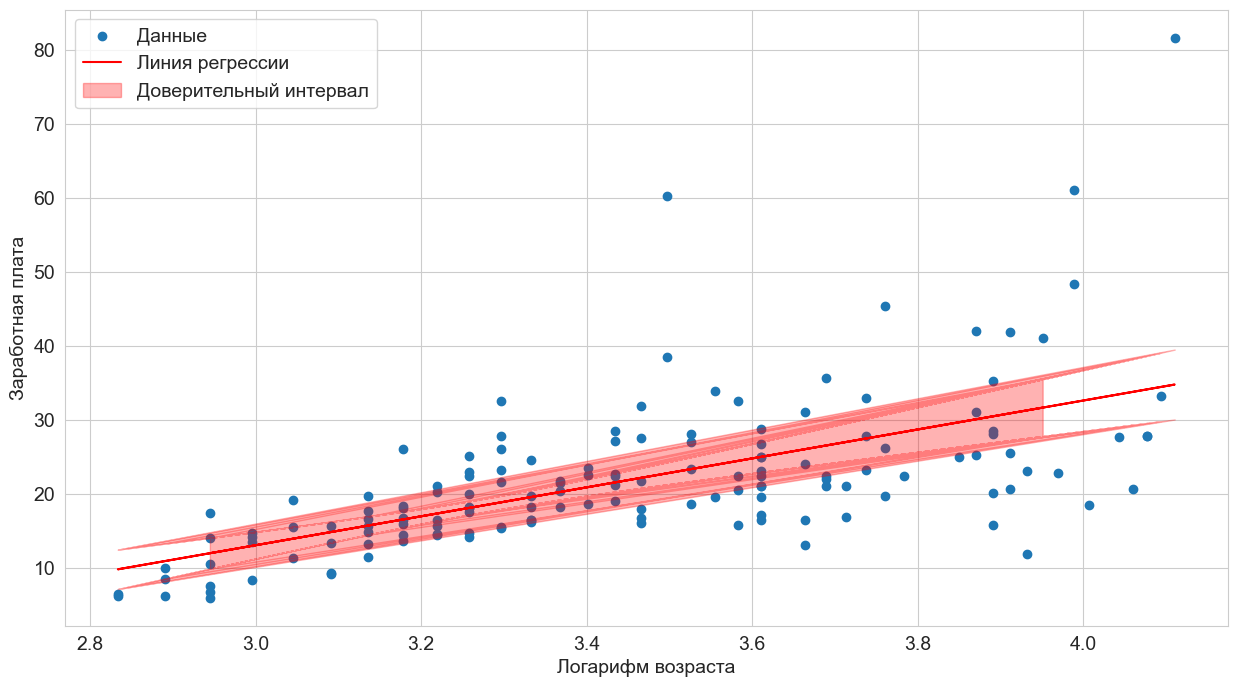

In [194]:
pt.scatter(wages['log_age'], wages['wage'], label='Данные')  
pt.xlabel('Логарифм возраста')
pt.ylabel('Заработная плата')

prediction = reg_log_age_wage.get_prediction(X)
summary_frame = prediction.summary_frame()
mean = summary_frame['mean']
mean_ci_lower = prediction.summary_frame()['mean_ci_lower']
mean_ci_upper = prediction.summary_frame()['mean_ci_upper']
pt.plot(wages['log_age'], mean, color='red', label='Линия регрессии')
pt.fill_between(wages['log_age'], mean_ci_lower, mean_ci_upper, color='red', alpha=0.3, label='Доверительный интервал')

pt.legend()
pt.show()

Выбрана данная модель, поскольку у нее низкие ошибки коэффициентов (и они значимы), достаточно высокий R^2 и  в ней выбросов меньше по количеству и качеству.

10.

In [195]:
#datafr = wages[wages['sex'] == 1][['wage', 'age']].groupby(wages['sex']).describe()
datafr_wage = wages[wages['sex'] == 1]['wage'].describe()
datafr_age = wages[wages['sex'] == 1]['age'].describe()
datafr_log_wage = wages[wages['sex'] == 1]['log_wage'].describe()
datafr_log_age = wages[wages['sex'] == 1]['log_age'].describe()

result = pd.DataFrame({
    'wage': datafr_wage,
    'age': datafr_age,
    'log_wage': datafr_log_wage,
    'log_age': datafr_log_age})
result = result.T
save_to_excel(result, 'men_table_characteristics')

Таблица сохранена под именем men_table_characteristics


In [196]:
datafr_wage2 = wages[wages['sex'] == 2]['wage'].describe()
datafr_age2 = wages[wages['sex'] == 2]['age'].describe()
datafr_log_wage2 = wages[wages['sex'] == 2]['log_wage'].describe()
datafr_log_age2 = wages[wages['sex'] == 2]['log_age'].describe()

result2 = pd.DataFrame({
    'wage': datafr_wage2,
    'age': datafr_age2,
    'log_wage': datafr_log_wage2,
    'log_age': datafr_log_age2})
result2 = result2.T
save_to_excel(result2, 'women_table_characteristics')

Таблица сохранена под именем women_table_characteristics


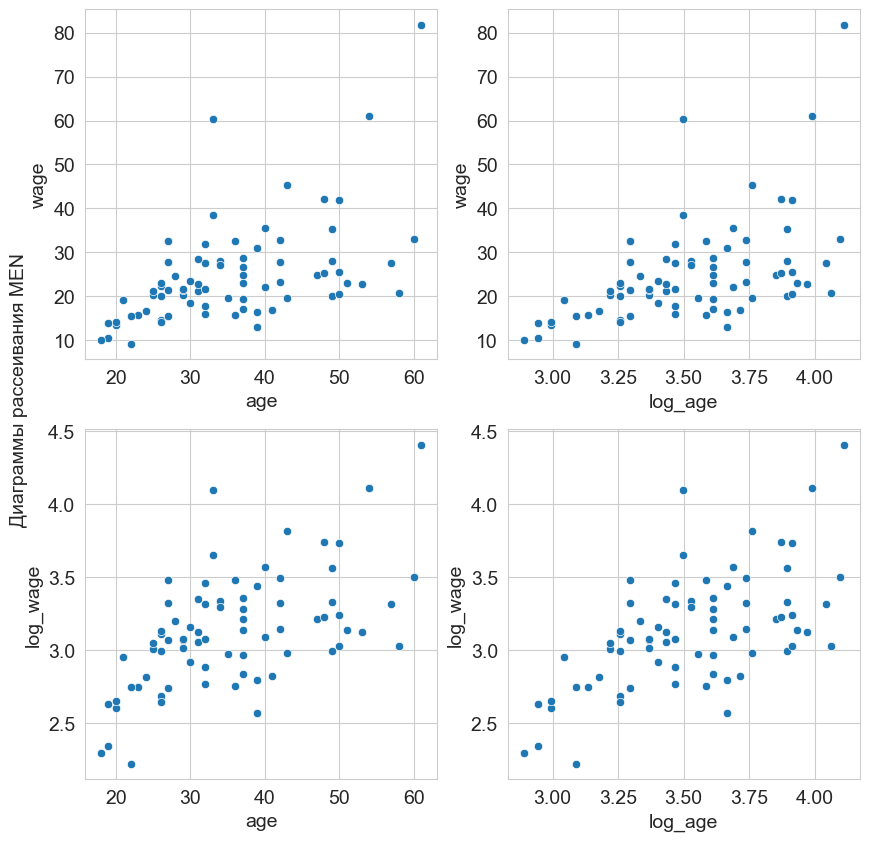

In [197]:
men_df = wages[wages['sex'] == 1]
fig, ax = pt.subplots(2,2, figsize = (10,10))
sn.scatterplot(x='age', y='wage', data=men_df, ax = ax[0,0])
sn.scatterplot(data=men_df, y='wage', x='log_age', ax = ax[0,1])
sn.scatterplot(data=men_df, y='log_wage', x='age', ax = ax[1,0])
sn.scatterplot(data=men_df, y='log_wage', x='log_age', ax = ax[1,1])
fig.text(x = 0.05, y = 0.5, s = 'Диаграммы рассеивания MEN', rotation = 'vertical', va = 'center')
pt3 = fig
pt.show()

Визуально на линейную зависимость опять же больше похожи верхние два графика

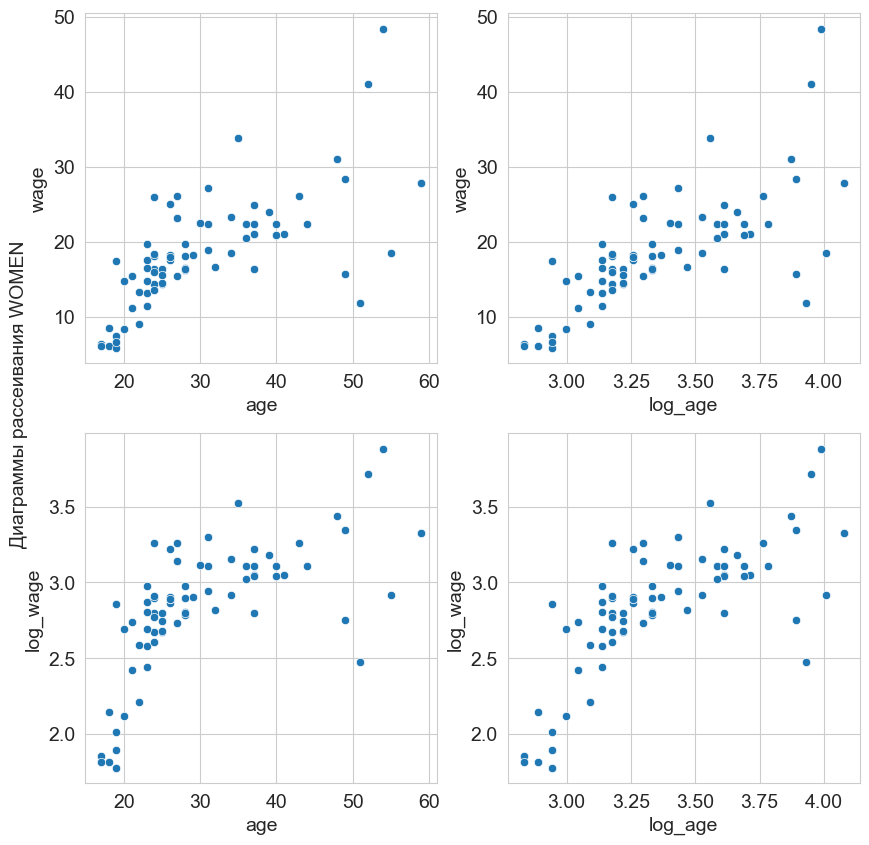

In [198]:
women_df = wages[wages['sex'] == 2]
fig, ax = pt.subplots(2,2, figsize = (10,10))
sn.scatterplot(x='age', y='wage', data=women_df, ax = ax[0,0])
sn.scatterplot(data=women_df, y='wage', x='log_age', ax = ax[0,1])
sn.scatterplot(data=women_df, y='log_wage', x='age', ax = ax[1,0])
sn.scatterplot(data=women_df, y='log_wage', x='log_age', ax = ax[1,1])
fig.text(x = 0.05, y = 0.5, s = 'Диаграммы рассеивания WOMEN', rotation = 'vertical', va = 'center')
pt4 = fig
pt.show()

У жнщин визуально возраст сильнее влияет на размер зп, чем у мужчин - проверим это далее.

In [199]:
y = men_df['wage']
X = sm.add_constant(men_df[['age']])

reg_men_age_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_men_age_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     12.96
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           0.000577
Time:                        21:40:46   Log-Likelihood:                -278.31
No. Observations:                  75   AIC:                             560.6
Df Residuals:                      73   BIC:                             565.3
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5546      4.999      0.911      0.362      -5.243      14.352
age            0.5713      0.159      3.600      0.000       0.260       0.882
==============================================================================
Omnibus:                       42.788   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.028
Skew:                           1.835   Prob(JB):                     9.59e-29
Kurtosis:                       8.274   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1 год зп мужчин растет на 0,5713 гульденов в час.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1 год, соответствующие им зарплаты отличаются на 0,5713 гульденов в час (зависимость прямая).

Стандартная ошибка b1 составляет 0,159, значение невысокое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 достаточно высокая, Z низкий => с высокой вероятностью коэффициент незначим, оценка неточная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 3,6, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [142]:
y = women_df['wage']
X = sm.add_constant(women_df[['age']])

reg_women_age_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_women_age_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     26.83
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.89e-06
Time:                        18:16:43   Log-Likelihood:                -233.03
No. Observations:                  75   AIC:                             470.1
Df Residuals:                      73   BIC:                             474.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9003      2.573      1.516      0.129      -1.142       8.942
age            0.4824      0.093      5.180      0.000       0.300       0.665
==============================================================================
Omnibus:                        8.655   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               14.920
Skew:                           0.317   Prob(JB):                     0.000576
Kurtosis:                       5.091   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1 год зп женщин растет на 0,4824 гульдена в час. (ниже, чем у мужчин). Значит, мы были не правы в своем предположении в среднем при прочих равных

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1 год, соответствующие им зарплаты отличаются на 0,4824 гульденов в час (зависимость прямая).

Стандартная ошибка b1 составляет 0,093, значение невысокое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 достаточно высокая, Z невысокий => с большой вероятностью коэффициент незначим, оценка неточная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 5,18, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [203]:
y = men_df['wage']
X = sm.add_constant(men_df[['log_age']])

reg_men_log_age_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_men_log_age_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     16.89
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           0.000103
Time:                        21:46:05   Log-Likelihood:                -278.56
No. Observations:                  75   AIC:                             561.1
Df Residuals:                      73   BIC:                             565.8
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.7336     16.405     -2.788      0.005     -77.887     -13.580
log_age       20.0254      4.873      4.109      0.000      10.474      29.577
==============================================================================
Omnibus:                       48.381   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.147
Skew:                           2.023   Prob(JB):                     1.53e-38
Kurtosis:                       9.273   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1% зп мужчин растет на 0,2 гульдена в час.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1%, соответствующие им зарплаты отличаются на 0,2 гульдена в час (зависимость прямая).

Стандартная ошибка b1 составляет 4,873, значение относительно невысокое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 невысокая, Z по модулю высокий => с большой вероятностью коэффициент значим, оценка точная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 4,109, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [143]:
y = women_df['wage']
X = sm.add_constant(women_df[['log_age']])

reg_women_log_age_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_women_log_age_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     37.05
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.88e-08
Time:                        18:17:06   Log-Likelihood:                -229.70
No. Observations:                  75   AIC:                             463.4
Df Residuals:                      73   BIC:                             468.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.5881      8.902     -4.223      0.000     -55.035     -20.141
log_age       16.7017      2.744      6.086      0.000      11.323      22.080
==============================================================================
Omnibus:                       14.569   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.819
Skew:                           0.573   Prob(JB):                     1.23e-07
Kurtosis:                       5.978   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1% зп женщин растет на 0,16 гульдена в час. Мы опять же были не правы.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1%, соответствующие им зарплаты отличаются на 0,16 гульдена в час (зависимость прямая).

Стандартная ошибка b1 составляет 2,744, значение относительно невысокое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 относительно невысокая, Z по модулю высокий => с большой вероятностью коэффициент значим, оценка точная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 6,086, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [201]:
y = men_df['log_wage']
X = sm.add_constant(men_df[['age']])

reg_men_age_log_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_men_age_log_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     27.37
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.55e-06
Time:                        21:40:47   Log-Likelihood:                -21.362
No. Observations:                  75   AIC:                             46.72
Df Residuals:                      73   BIC:                             51.36
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3818      0.139     17.107      0.000       2.109       2.655
age            0.0211      0.004      5.231      0.000       0.013       0.029
==============================================================================
Omnibus:                        3.304   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.595
Skew:                           0.434   Prob(JB):                        0.273
Kurtosis:                       3.281   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1 год зп мужчин растет на 2,11%.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1 год, соответствующие им зарплаты отличаются на 2,11% (зависимость прямая).

Стандартная ошибка b1 составляет 0,004, значение крайне низкое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 невысокая, Z по модулю очень высокий => с большой вероятностью коэффициент значим, оценка точная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 5,231, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [144]:
y = women_df['log_wage']
X = sm.add_constant(women_df[['age']])

reg_women_age_log_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_women_age_log_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     33.47
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.68e-07
Time:                        18:17:27   Log-Likelihood:                -20.786
No. Observations:                  75   AIC:                             45.57
Df Residuals:                      73   BIC:                             50.21
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0345      0.146     13.938      0.000       1.748       2.321
age            0.0264      0.005      5.785      0.000       0.017       0.035
==============================================================================
Omnibus:                        9.446   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.276
Skew:                          -0.832   Prob(JB):                      0.00968
Kurtosis:                       3.450   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1 год зп женщин растет на 2,64%. А здесь мы как будто правы в предположении о более сильной зависимости зп от возраста у женщин.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1 год, соответствующие им зарплаты отличаются на 2,64% (зависимость прямая).

Стандартная ошибка b1 составляет 0,005, значение крайне низкое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 невысокая, Z по модулю очень высокий => с большой вероятностью коэффициент значим, оценка точная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 5,785, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [202]:
y = men_df['log_wage']
X = sm.add_constant(men_df[['log_age']])

reg_men_log_age_log_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_men_log_age_log_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     36.22
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           6.47e-08
Time:                        21:40:47   Log-Likelihood:                -19.739
No. Observations:                  75   AIC:                             43.48
Df Residuals:                      73   BIC:                             48.11
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3956      0.444      0.890      0.373      -0.475       1.266
log_age        0.7757      0.129      6.018      0.000       0.523       1.028
==============================================================================
Omnibus:                        4.623   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.786
Skew:                           0.497   Prob(JB):                        0.151
Kurtosis:                       3.473   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1% зп мужчин растет на 0,7757%.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1%, соответствующие им зарплаты отличаются на 0,7757% (зависимость прямая).

Стандартная ошибка b1 составляет 0,129, значение достаточно низкое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 достаточно высокая, Z по модулю невысокий => с большой вероятностью коэффициент незначим, оценка неточная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 6,018, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

In [145]:
y = women_df['log_wage']
X = sm.add_constant(women_df[['log_age']])

reg_women_log_age_log_wage = sm.OLS(y, X).fit(cov_type='HC0') 
reg_women_log_age_log_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     46.57
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.20e-09
Time:                        18:17:40   Log-Likelihood:                -14.229
No. Observations:                  75   AIC:                             32.46
Df Residuals:                      73   BIC:                             37.09
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3963      0.477     -0.831      0.406      -1.331       0.538
log_age        0.9620      0.141      6.824      0.000       0.686       1.238
==============================================================================
Omnibus:                        6.967   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.249
Skew:                          -0.649   Prob(JB):                       0.0440
Kurtosis:                       3.559   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

В среднем при прочих равных условиях при увеличении возраста на 1% зп женщин растет на 0,962%. Здесь мы опять же оказываемся правы в своем предположении.

Также можно интерпретировать как прогноз: в среднем при прочих равных условиях для двух наблюдений по возрасту, отличающихся на 1%, соответствующие им зарплаты отличаются на 0,962% (зависимость прямая).

Стандартная ошибка b1 составляет 0,141, значение достаточно низкое => оценка коэффиента b1 имеет хорошую точность.

Ошибка b0 достаточно высокая, Z по модулю невысокий => с большой вероятностью коэффициент незначим, оценка неточная.

H0: b1 = 0 и не значим для У

H1: b1 != 0 и значим для У

Z равняется 6,824, что больше 1,96 (значения Z в двустороннем интервале при уровне значимости a = 5%), что говорит о том, что мы отвергаем нулевую гипотезу () о незначимости данного регрессора в пользу Н1.

Касательно нашего предположения: у женщин прослеживается действительно более сильная зависимость как от возраста, так и от логарифма возраста, но только если рассматривать логарифм от зарплаты.